In [2]:
import keras
import numpy as np
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
from keras import models
from keras import layers
from keras import optimizers
%matplotlib inline


#https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt   

Using TensorFlow backend.


In [3]:
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet')


In [4]:
vgg_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

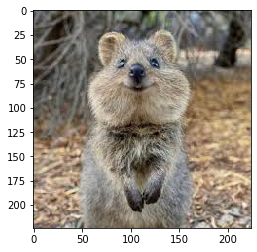

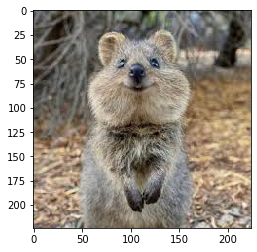

image batch size (1, 224, 224, 3)


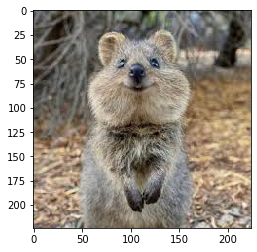

In [5]:
filename = 'quokka.jpg'
original = load_img(filename, target_size=(224, 224))
plt.imshow(original)
plt.show()

numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()

image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [6]:
#안전하게 복사분 준비
processed_image = vgg16.preprocess_input(image_batch.copy())
predictions = vgg_model.predict(processed_image)
print(predictions.shape)
label_vgg = decode_predictions(predictions, top=10)
print(label_vgg)

(1, 1000)
40960/35363 [==================================] - 0s 1us/step
[[('n02361337', 'marmot', 0.1709216), ('n02117135', 'hyena', 0.1270579), ('n01877812', 'wallaby', 0.0859533), ('n02363005', 'beaver', 0.07262015), ('n01883070', 'wombat', 0.055227626), ('n02138441', 'meerkat', 0.043401174), ('n02132136', 'brown_bear', 0.040997677), ('n02137549', 'mongoose', 0.028638314), ('n02486410', 'baboon', 0.024274316), ('n02444819', 'otter', 0.021342412)]]
